In [1]:
# initialization with packages
from clean import clean_data 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#Load dataset
df= pd.read_csv('../data/TBI PUD 10-08-2013.csv')

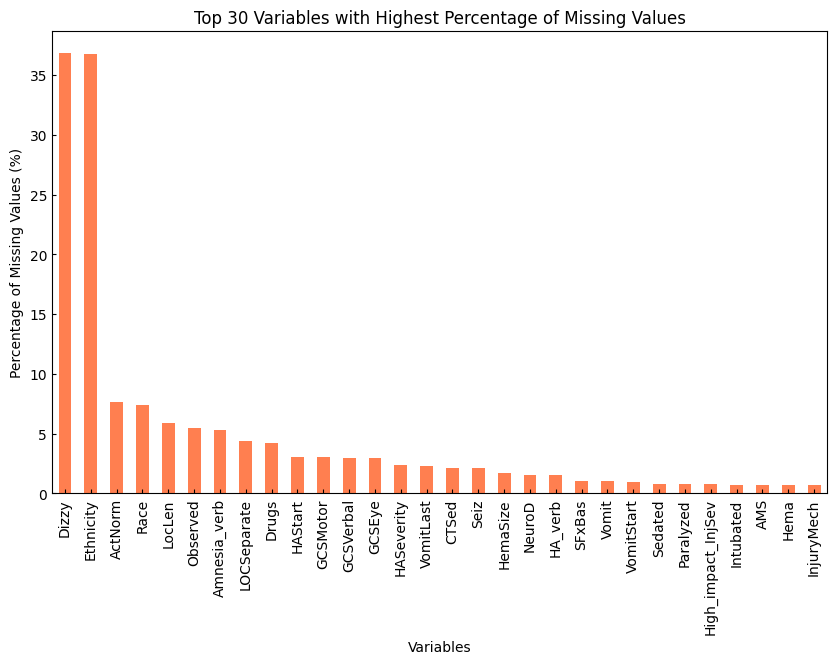

In [3]:
# The preliminary data screening to assess the condition of the dataset.
# Calculate the percentage of missing values for each column
missing_percent = (df.isnull().sum() / len(df)) * 100

# Sort columns by missing percentage and select top 30
missing_percent_sorted = missing_percent.sort_values(ascending=False).head(30)

# Plot the top 30 columns with the highest missing values in percentage
plt.figure(figsize=(10, 6))
missing_percent_sorted.plot(kind='bar', color='coral')

# Set x and y axis ticks to be inside the plot
plt.tick_params(axis='x', direction='in', length=3)
plt.tick_params(axis='y', direction='in', length=3)



# Titles and labels
plt.title('Top 30 Variables with Highest Percentage of Missing Values')
plt.xlabel('Variables')
plt.ylabel('Percentage of Missing Values (%)')

# Rotate the x ticks for better readability
plt.xticks(rotation=90)
plt.savefig('../figures/missing_values_plot.pdf', format='pdf', bbox_inches='tight')
plt.show()


In [4]:
clean_data(df)
cleaned_df= clean_data(df)

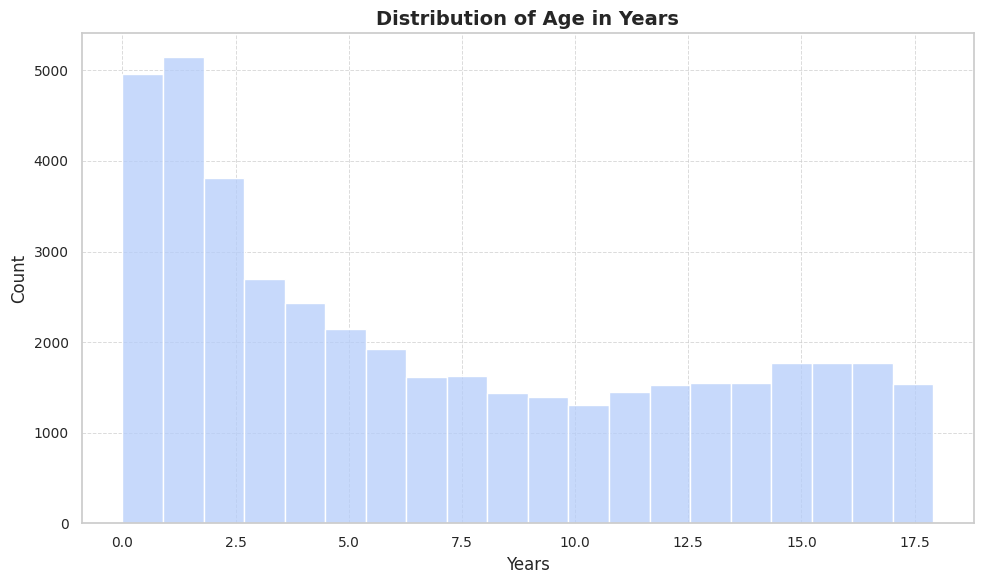

In [5]:
# Set a general style for the plots
sns.set(style="whitegrid")

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Define a color palette for the plot
palette = sns.color_palette("coolwarm", 10)

# Histogram for Age in Years
sns.histplot(df['AgeInMonth']/12, bins=20, kde=False, ax=ax, color=palette[3])
ax.set_title('Distribution of Age in Years', fontsize=14, weight='bold')
ax.set_xlabel('Years', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

# Adjust layout 
plt.tight_layout()

# Save the figure
plt.savefig('../figures/distribution_age.pdf', format='pdf', bbox_inches='tight', dpi=300)

#show the plot
plt.show()


/tmp/ipykernel_172050/3679547191.py:24: UserWarning: The palette list has more values (14) than needed (13), which may not be intended.
  sns.countplot(y='InjuryMech', data=df, order=df['InjuryMech'].value_counts().index, hue='InjuryMech', dodge=False, palette=new_palette, legend=False)


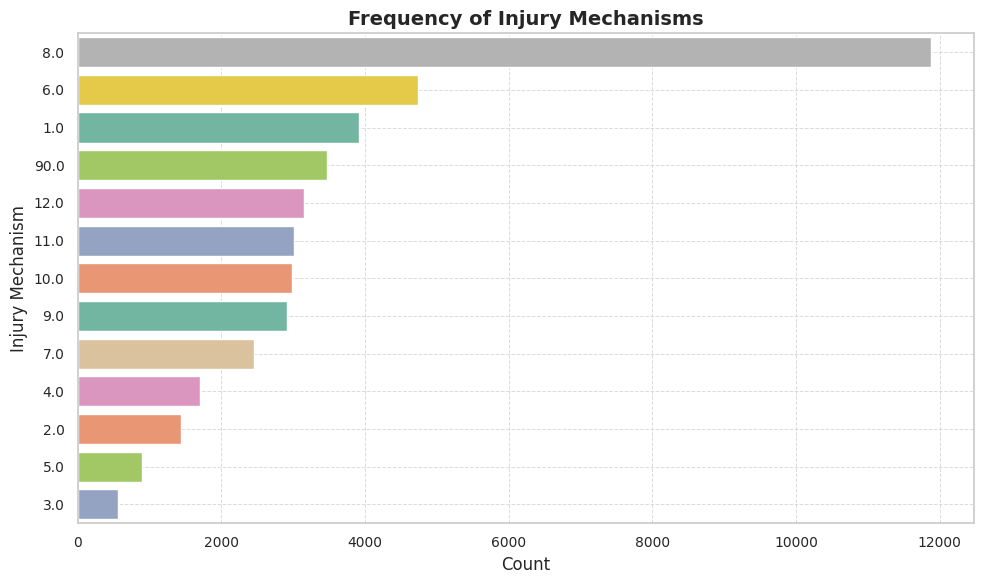

In [6]:
# Define the injury mechanism mapping dictionary
injury_mechanism_map = {
    1: 'MVC Occupant',
    2: 'Pedestrian struck',
    3: 'Bike rider struck',
    4: 'Bike collision/fall',
    5: 'Other transport crash',
    6: 'Fall to ground',
    7: 'Walked into object',
    8: 'Fall from elevation',
    9: 'Fall down stairs',
    10: 'Sports',
    11: 'Assault',
    12: 'Head struck - accidental',
    90: 'Other mechanism'
}
# Create the plot
plt.figure(figsize=(10, 6))

# Define a color palette
new_palette = sns.color_palette("Set2", len(df['InjuryMech'].unique()))

# Create the countplot
sns.countplot(y='InjuryMech', data=df, order=df['InjuryMech'].value_counts().index, hue='InjuryMech', dodge=False, palette=new_palette, legend=False)

# Set title and labels
plt.title('Frequency of Injury Mechanisms', fontsize=14, weight='bold')
plt.ylabel('Injury Mechanism', fontsize=12)
plt.xlabel('Count', fontsize=12)

# Customize ticks and grid
plt.tick_params(axis='both', which='major', labelsize=10)
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

# Adjust layout
plt.tight_layout()

# Save the figure 
plt.savefig('../figures/distribution_injury.pdf', format='pdf', bbox_inches='tight', dpi=300)

# Show the plot
plt.show()



/tmp/ipykernel_172050/1616187545.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  cleaned_df['HospHead'] = cleaned_df['HospHead'].replace({0: 'No', 1: 'Yes'})
/tmp/ipykernel_172050/1616187545.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  cleaned_df['DeathTBI'] = cleaned_df['DeathTBI'].replace({0: 'No', 1: 'Yes'})


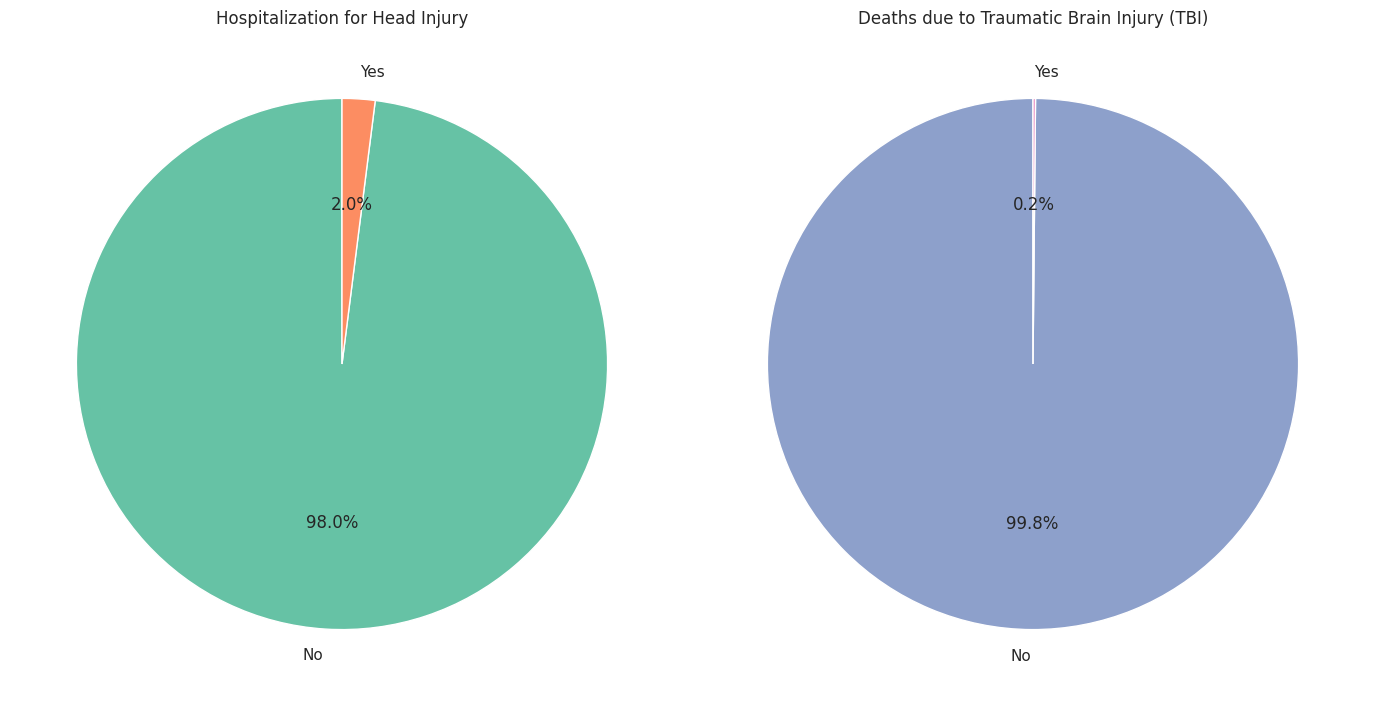

In [7]:
# Replace 0 and 1 with 'No' and 'Yes' 
cleaned_df['HospHead'] = cleaned_df['HospHead'].replace({0: 'No', 1: 'Yes'})
cleaned_df['DeathTBI'] = cleaned_df['DeathTBI'].replace({0: 'No', 1: 'Yes'})

# Creating pie charts
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Pie chart for Hospitalization for Head Injury
cleaned_df['HospHead'].value_counts().plot(kind='pie', ax=axes[0], autopct='%1.1f%%', colors=['#66c2a5', '#fc8d62'], startangle=90)
axes[0].set_title('Hospitalization for Head Injury')
axes[0].set_ylabel('')

# Pie chart for Deaths due to Traumatic Brain Injury (TBI)
cleaned_df['DeathTBI'].value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%', colors=['#8da0cb', '#e78ac3'], startangle=90)
axes[1].set_title('Deaths due to Traumatic Brain Injury (TBI)')
axes[1].set_ylabel('')

# Display the plot
plt.tight_layout()

# Save the figure
plt.savefig('../figures/distribution_hospitalization_TBI.pdf', format='pdf', bbox_inches='tight', dpi=300)

# Show the plot
plt.show()


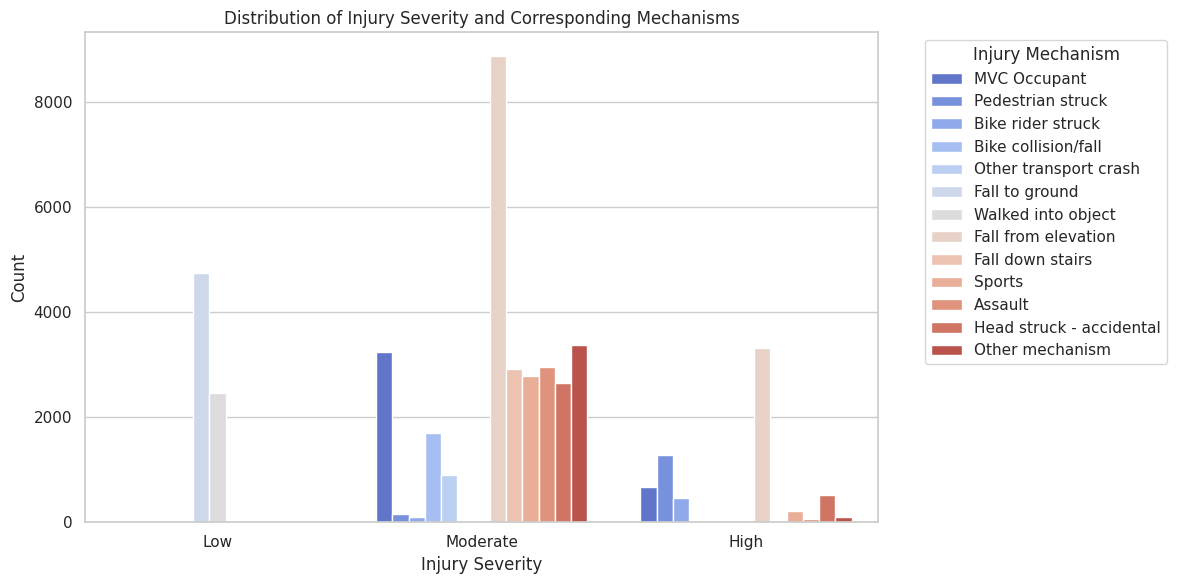

In [8]:
# Mapping the Injury Severity (High_impact_InjSev) and Injury Mechanism (InjuryMech)
injury_severity_map = {1: 'Low', 2: 'Moderate', 3: 'High'}
injury_mechanism_map = {
    1: 'MVC Occupant',
    2: 'Pedestrian struck',
    3: 'Bike rider struck',
    4: 'Bike collision/fall',
    5: 'Other transport crash',
    6: 'Fall to ground',
    7: 'Walked into object',
    8: 'Fall from elevation',
    9: 'Fall down stairs',
    10: 'Sports',
    11: 'Assault',
    12: 'Head struck - accidental',
    90: 'Other mechanism'
}

# Apply the mappings
cleaned_df['High_impact_InjSev'] = cleaned_df['High_impact_InjSev'].map(injury_severity_map)
cleaned_df['InjuryMech'] = cleaned_df['InjuryMech'].map(injury_mechanism_map)

# Plotting
plt.figure(figsize=(12, 6))
sns.countplot(x='High_impact_InjSev', hue='InjuryMech', data=cleaned_df, palette='coolwarm')
plt.title('Distribution of Injury Severity and Corresponding Mechanisms')
plt.xlabel('Injury Severity')
plt.ylabel('Count')
plt.legend(title='Injury Mechanism', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save the figure
plt.savefig('../figures/distribution_injury_mechanism.pdf', format='pdf', bbox_inches='tight', dpi=300)

# Show the plot
plt.show()


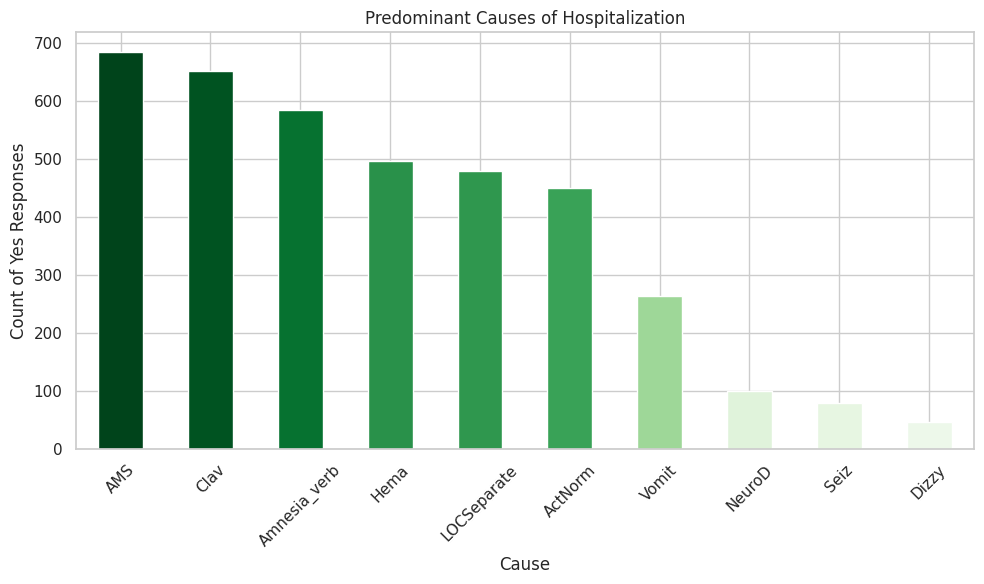

In [9]:
clean_data(df)
df= clean_data(df)

# Identify the relevant symptom and cause columns
cause_columns = [
    'Seiz', 'Amnesia_verb', 'LOCSeparate', 'ActNorm', 'Vomit', 'Dizzy', 'AMS', 'Hema', 'Clav', 'NeuroD'
]

# Convert these columns to categorical
for col in cause_columns:
    df[col] = df[col].apply(lambda x: 1 if x != 0 else 0)

# Filter the data for hospitalized cases
hosp_data = df[df['HospHead'] == 1]

# Count the occurrences of 'Yes'
hosp_cause_summary = hosp_data[cause_columns].apply(lambda x: (x == 1).sum())

# Sorting the cause 
hosp_cause_summary_sorted = hosp_cause_summary.sort_values(ascending=False)

# Generating a color gradient 
colors = plt.cm.Greens(hosp_cause_summary_sorted / float(max(hosp_cause_summary_sorted)))

# Plot the distribution
plt.figure(figsize=(10, 6))
hosp_cause_summary_sorted.plot(kind='bar', color=colors)
plt.title('Predominant Causes of Hospitalization')
plt.xlabel('Cause')
plt.ylabel('Count of Yes Responses')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the figure
plt.savefig('../figures/cause_hospitalization.pdf', format='pdf', bbox_inches='tight', dpi=300)

# Show the plot
plt.show()



/tmp/ipykernel_172050/3560796952.py:23: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  age_gender_vs_tbi = cleaned_df.pivot_table(values='PosIntFinal', index='Age_Group', columns='Gender', aggfunc='mean')


<Figure size 1000x600 with 0 Axes>

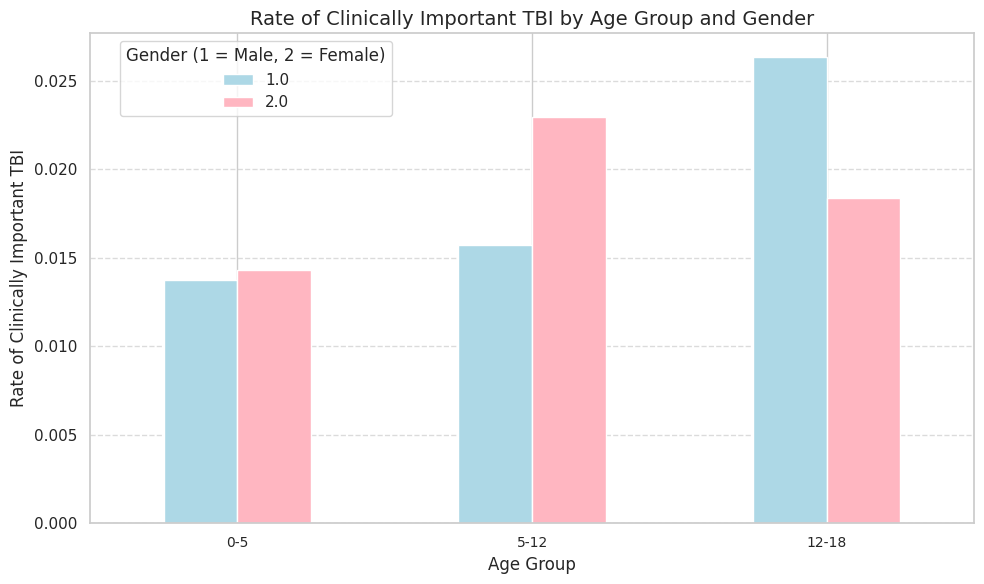

In [10]:
# Correct the age grouping logic
def age_grouping(age_in_month):
    if age_in_month < 60:
        return '0-5'
    elif age_in_month < 144:
        return '5-12'
    else:
        return '12-18'

# Apply the correct age 
cleaned_df['Age_Group'] = cleaned_df['AgeInMonth'].apply(age_grouping)

correct_order = ['0-5', '5-12', '12-18']
cleaned_df['Age_Group'] = pd.Categorical(cleaned_df['Age_Group'], categories=correct_order, ordered=True)

# Ensure 'Gender' is numeric
cleaned_df['Gender'] = pd.to_numeric(cleaned_df['Gender'], errors='coerce')

# Ensure 'PosIntFinal' does not have missing values
cleaned_df['PosIntFinal'] = pd.to_numeric(cleaned_df['PosIntFinal'], errors='coerce')

# Recreate the pivot table 
age_gender_vs_tbi = cleaned_df.pivot_table(values='PosIntFinal', index='Age_Group', columns='Gender', aggfunc='mean')



# Plot the result
plt.figure(figsize=(10, 6))
age_gender_vs_tbi.plot(kind='bar', color=['lightblue', 'lightpink'], figsize=(10, 6))
plt.title('Rate of Clinically Important TBI by Age Group and Gender', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Rate of Clinically Important TBI', fontsize=12)
plt.legend(title='Gender (1 = Male, 2 = Female)', loc='upper right', bbox_to_anchor=(0.35, 1))
plt.xticks(rotation=0, fontsize=10)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save the figure
plt.savefig('../figures/CiTBI.pdf', format='pdf', bbox_inches='tight', dpi=300)

plt.show()


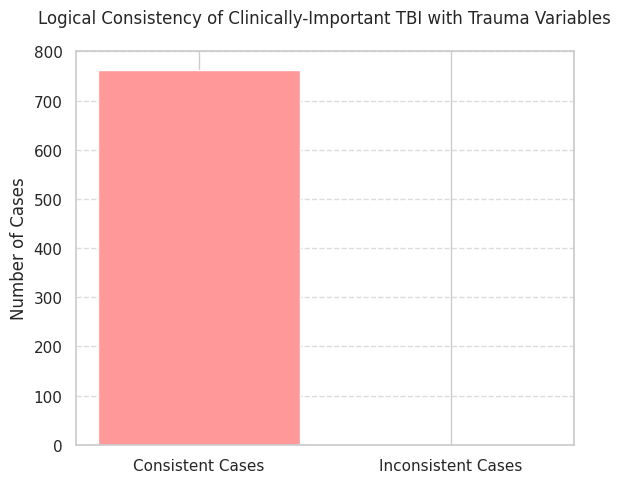

(0, 763)

In [11]:
inconsistent_cases = cleaned_df[(cleaned_df['PosIntFinal'] == 1) & 
                              (cleaned_df['DeathTBI'] == 0) & 
                              (cleaned_df['HospHead'] == 0) & 
                              (cleaned_df['Neurosurgery'] == 0) & 
                              (cleaned_df['Intub24Head'] == 0)]

# Count the number of inconsistent cases
inconsistent_count = inconsistent_cases.shape[0]

# Step 2: Calculate total cases where PosIntFinal = 1 for reference
total_posintfinal_cases = cleaned_df[cleaned_df['PosIntFinal'] == 1].shape[0]

# Step 3: Visualize consistent and inconsistent cases
consistent_count = total_posintfinal_cases - inconsistent_count

# Create a bar plot to compare the number of consistent vs inconsistent cases
labels = ['Consistent Cases', 'Inconsistent Cases']
values = [consistent_count, inconsistent_count]

plt.figure(figsize=(6, 5))
plt.bar(labels, values, color=['#FF9999','lightgreen'])
plt.title('Logical Consistency of Clinically-Important TBI with Trauma Variables', fontsize=12, pad=20)
plt.ylabel('Number of Cases')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

# Save the figure
plt.savefig('../figures/reality.pdf', format='pdf', bbox_inches='tight', dpi=300)

# Show the plot
plt.show()

# Output the number of inconsistent cases and total cases for reference
inconsistent_count, total_posintfinal_cases

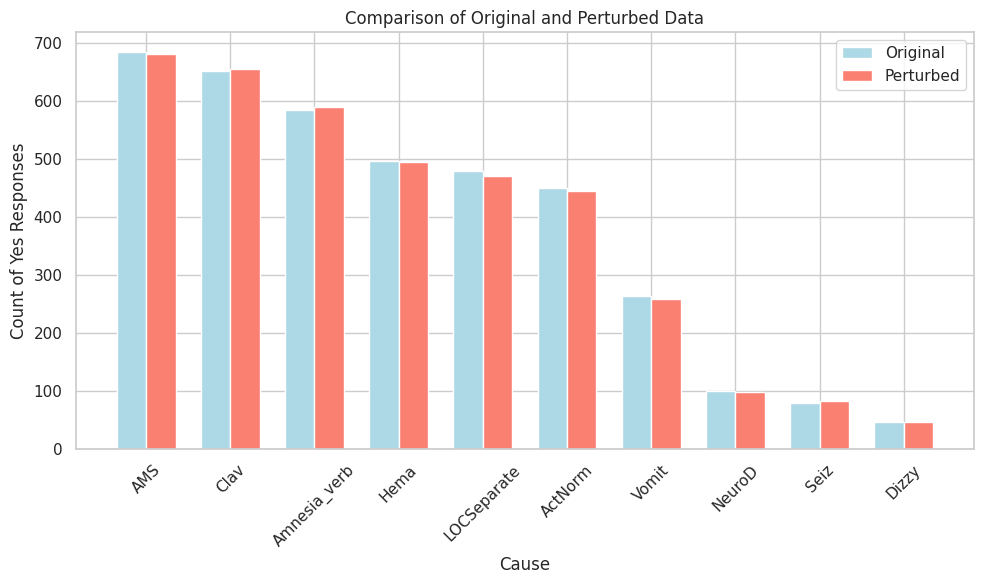

Differences between original and perturbed data:
AMS: -3
Clav: +4
Amnesia_verb: +5
Hema: -1
LOCSeparate: -10
ActNorm: -5
Vomit: -5
NeuroD: -3
Seiz: +3
Dizzy: +0


In [12]:
# import data
df = clean_data(df)

# Define cause columns
cause_columns = [
    'Seiz', 'Amnesia_verb', 'LOCSeparate', 'ActNorm', 'Vomit', 'Dizzy', 'AMS', 'Hema', 'Clav', 'NeuroD'
]

# Convert cause columns to binary
for col in cause_columns:
    df[col] = df[col].apply(lambda x: 1 if x != 0 else 0)

# Filter the data for hospitalized cases
hosp_data = df[df['HospHead'] == 1]

# Count the occurrences of 'Yes' for each cause
hosp_cause_summary = hosp_data[cause_columns].apply(lambda x: (x == 1).sum())

# Sort the cause 
hosp_cause_summary_sorted = hosp_cause_summary.sort_values(ascending=False)

# Plot 
def plot_comparison(original, perturbed, title, filename):
    indices = np.arange(len(original))
    width = 0.35 

    plt.figure(figsize=(10, 6))
    
    # Plot original data
    plt.bar(indices, original, width, label='Original', color='lightblue')

    # Plot perturbed data
    plt.bar(indices + width, perturbed, width, label='Perturbed', color='salmon')

    plt.title(title)
    plt.xlabel('Cause')
    plt.ylabel('Count of Yes Responses')
    plt.xticks(indices + width / 2, original.index, rotation=45)
    plt.legend()

    # Save the figure
    plt.tight_layout()
    plt.savefig(filename, format='pdf', bbox_inches='tight', dpi=300)
    
    # Show the plot
    plt.show()


# Introduce perturbations 
perturbed_hosp_cause_summary = hosp_cause_summary_sorted.apply(lambda x: x + np.random.randint(-10, 10))

# Plot the original and perturbed data 
plot_comparison(hosp_cause_summary_sorted, perturbed_hosp_cause_summary, 'Comparison of Original and Perturbed Data', '../figures/cause_hospitalization_comparison.pdf')

# Compare the differences between original and perturbed data
def compare_differences(original, perturbed):
    differences = perturbed - original
    print("Differences between original and perturbed data:")
    for key, diff in zip(original.index, differences):
        print(f"{key}: {diff:+d}")

# Compare the differences
compare_differences(hosp_cause_summary_sorted, perturbed_hosp_cause_summary)
